In [791]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [792]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [793]:
df = pd.read_csv("Leads.csv")

In [794]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [795]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### CLEANING

In [797]:
# Handle 'Select' level and convert these values to NaN
df = df.replace('Select', np.nan)

In [798]:
missingpercentage = df.isnull().mean()*100
missingpercentage

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [799]:
#drop missing value records where missing value percentage is very low 

In [800]:
df = df[-(df["Lead Source"].isnull())]
df = df[-(df["TotalVisits"].isnull())]
df = df[-(df["Page Views Per Visit"].isnull())]
df = df[-(df["Last Activity"].isnull())]

In [801]:
missingpercentage = df.isnull().mean()*100
missingpercentage[missingpercentage>0]

Country                                          25.303064
Specialization                                   36.169275
How did you hear about X Education               78.091250
What is your current occupation                  29.567996
What matters most to you in choosing a course    29.777386
Tags                                             36.665197
Lead Quality                                     52.016751
Lead Profile                                     74.465506
City                                             39.398281
Asymmetrique Activity Index                      45.768129
Asymmetrique Profile Index                       45.768129
Asymmetrique Activity Score                      45.768129
Asymmetrique Profile Score                       45.768129
dtype: float64

In [802]:
#checked value counts of all the columns

for col in df.columns:
    print(df[col].value_counts())
    print("\n")

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
5379ee79-64b7-44f8-8c56-0e1ca2d5b887    1
9757ace3-0656-4400-b519-fe0e3c67599e    1
889c1057-97ab-477c-a2b7-423e7df2d226    1
dd5ed9c0-298b-416e-b7e3-ee4da8511b8f    1
                                       ..
bff6c61d-25e3-4b1e-bf17-b634c91f3e2f    1
c62678c1-e741-4874-b5cf-500b2e8e2a78    1
4e859886-6ae2-462b-abd0-1df6ae65d8bf    1
78a9c58c-c287-41e3-a0f5-034061b73343    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9074, dtype: int64


Lead Number
660737    1
602411    1
602438    1
602435    1
602420    1
         ..
630128    1
630135    1
630139    1
630158    1
579533    1
Name: count, Length: 9074, dtype: int64


Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64


Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference     

In [803]:
#drop columns with missing values greater than 40% .

In [804]:
df = df.drop(['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [805]:
#drop these columns which are not useful
df = df.drop(['Prospect ID', 'Lead Number'], axis=1)

In [806]:
missingpercentage = df.isnull().mean()*100
missingpercentage[missingpercentage>0]

Country                                          25.303064
Specialization                                   36.169275
What is your current occupation                  29.567996
What matters most to you in choosing a course    29.777386
Tags                                             36.665197
City                                             39.398281
dtype: float64

In [807]:
# 'What matters most to you in choosing a course' - highly skewed column so we can remove this column

In [808]:
df = df.drop(['What matters most to you in choosing a course'], axis=1)

In [809]:
# 'Country' - most values are 'India', so replacing missing values with mode

In [810]:
df["Country"] = df.Country.fillna(df.Country.mode()[0])

In [811]:
# Replacing missing values with "unknown"

In [812]:
df["Specialization"] = df.Specialization.fillna("Unknown")
df["What is your current occupation"] = df["What is your current occupation"].fillna("Unknown")
df["Tags"] = df["Tags"].fillna("Unknown")
df["City"] = df["City"].fillna("Unknown")

In [813]:
missingpercentage = df.isnull().mean()*100
missingpercentage[missingpercentage>0]

Series([], dtype: float64)

In [814]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9074 non-null   object 
 1   Lead Source                               9074 non-null   object 
 2   Do Not Email                              9074 non-null   object 
 3   Do Not Call                               9074 non-null   object 
 4   Converted                                 9074 non-null   int64  
 5   TotalVisits                               9074 non-null   float64
 6   Total Time Spent on Website               9074 non-null   int64  
 7   Page Views Per Visit                      9074 non-null   float64
 8   Last Activity                             9074 non-null   object 
 9   Country                                   9074 non-null   object 
 10  Specialization                           

In [815]:
#changed the datatype to int
df.TotalVisits = df.TotalVisits.astype(int)
df["Page Views Per Visit"] = df['Page Views Per Visit'].astype(int)

In [816]:
df.nunique()

Lead Origin                                    4
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1717
Page Views Per Visit                          19
Last Activity                                 17
Country                                       38
Specialization                                19
What is your current occupation                7
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Tags                

In [817]:
df['Receive More Updates About Our Courses'].value_counts()

Receive More Updates About Our Courses
No    9074
Name: count, dtype: int64

In [818]:
#drop columns with nunique=1
df = df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [819]:
#checked value counts of all the columns

for col in df.columns:
    print(df[col].value_counts())
    print("\n")

Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64


Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64


Do Not Email
No     8358
Yes     716
Name: count, dtype: int64


Do Not Call
No     9072
Yes       2
Name: count, dtype: int64


Converted
0    5639
1    3435
Name: count, dtype: int64


TotalVisits
0      2161
2      1679
3      1306
4      1120

In [820]:
# droped columns in which only one value was majorly present for all the data points. 

In [821]:
df = df.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations'], axis = 1)

In [822]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### EDA

#### Univariate Analysis

In [825]:
df1 = df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity']]
df1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,Page Visited on Website,India,Unknown,Unemployed,Interested in other courses,Unknown,No,Modified
1,API,Organic Search,No,0,Email Opened,India,Unknown,Unemployed,Ringing,Unknown,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,Converted to Lead,India,Unknown,Unemployed,Will revert after reading the email,Mumbai,No,Modified


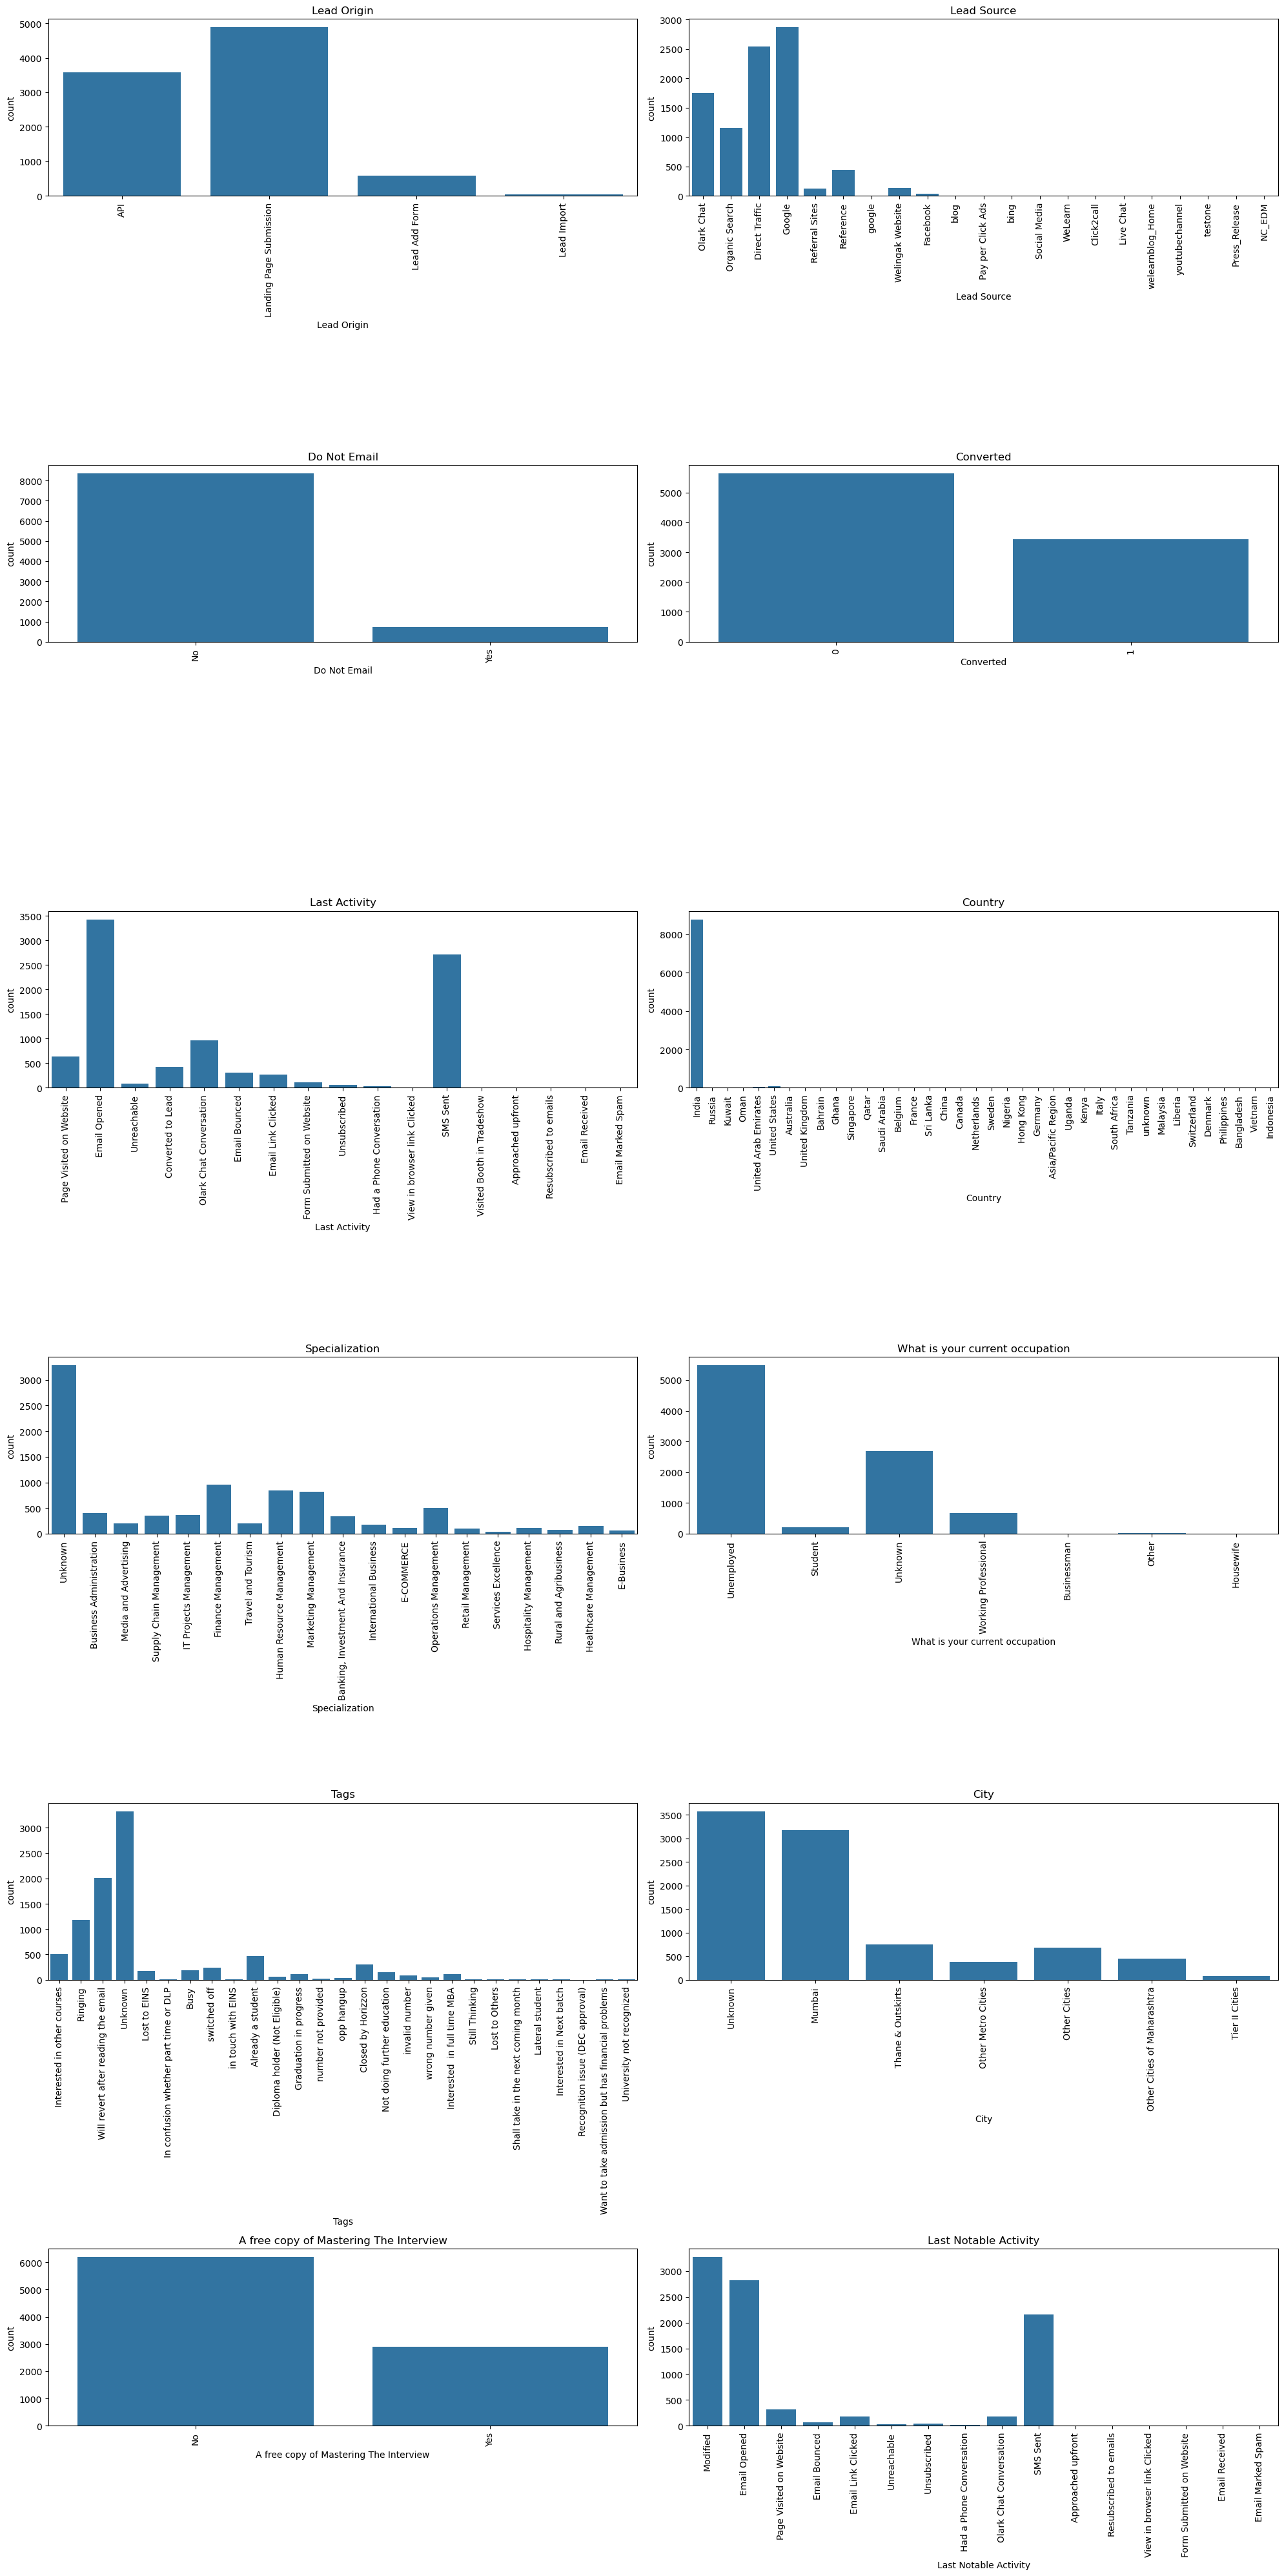

In [826]:
plt.figure(figsize = (20,40))

for i, col in enumerate(df1.columns, 1):
    plt.subplot(6, 2, i)
    sns.countplot(x=col, data=df1)
    plt.title(col)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

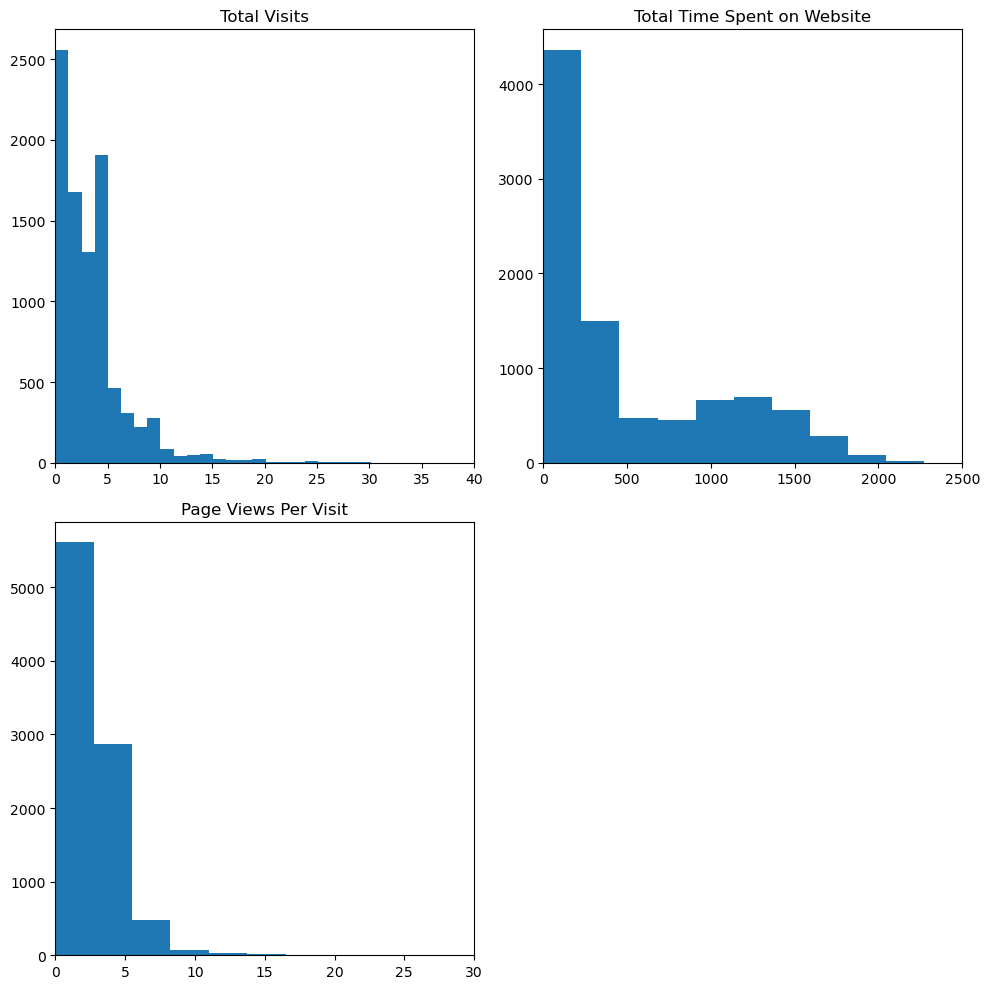

In [827]:
plt.figure(figsize=(10, 10))

# Plot for 'Total Visits'
plt.subplot(2, 2, 1)
plt.hist(df['TotalVisits'], bins=200)
plt.title('Total Visits')
plt.xlim(0, 40)

# Plot for 'Total Time Spent on Website'
plt.subplot(2, 2, 2)
plt.hist(df['Total Time Spent on Website'], bins=10)
plt.title('Total Time Spent on Website')
plt.xlim(0, 2500)

# Plot for 'Page Views Per Visit'
plt.subplot(2, 2, 3)
plt.hist(df['Page Views Per Visit'], bins=20)
plt.title('Page Views Per Visit')
plt.xlim(0, 30)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

In [828]:
conversion_rate = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion_rate

37.85541106458012

##### lead conversion rate is 38%

#### Bivariate analysis

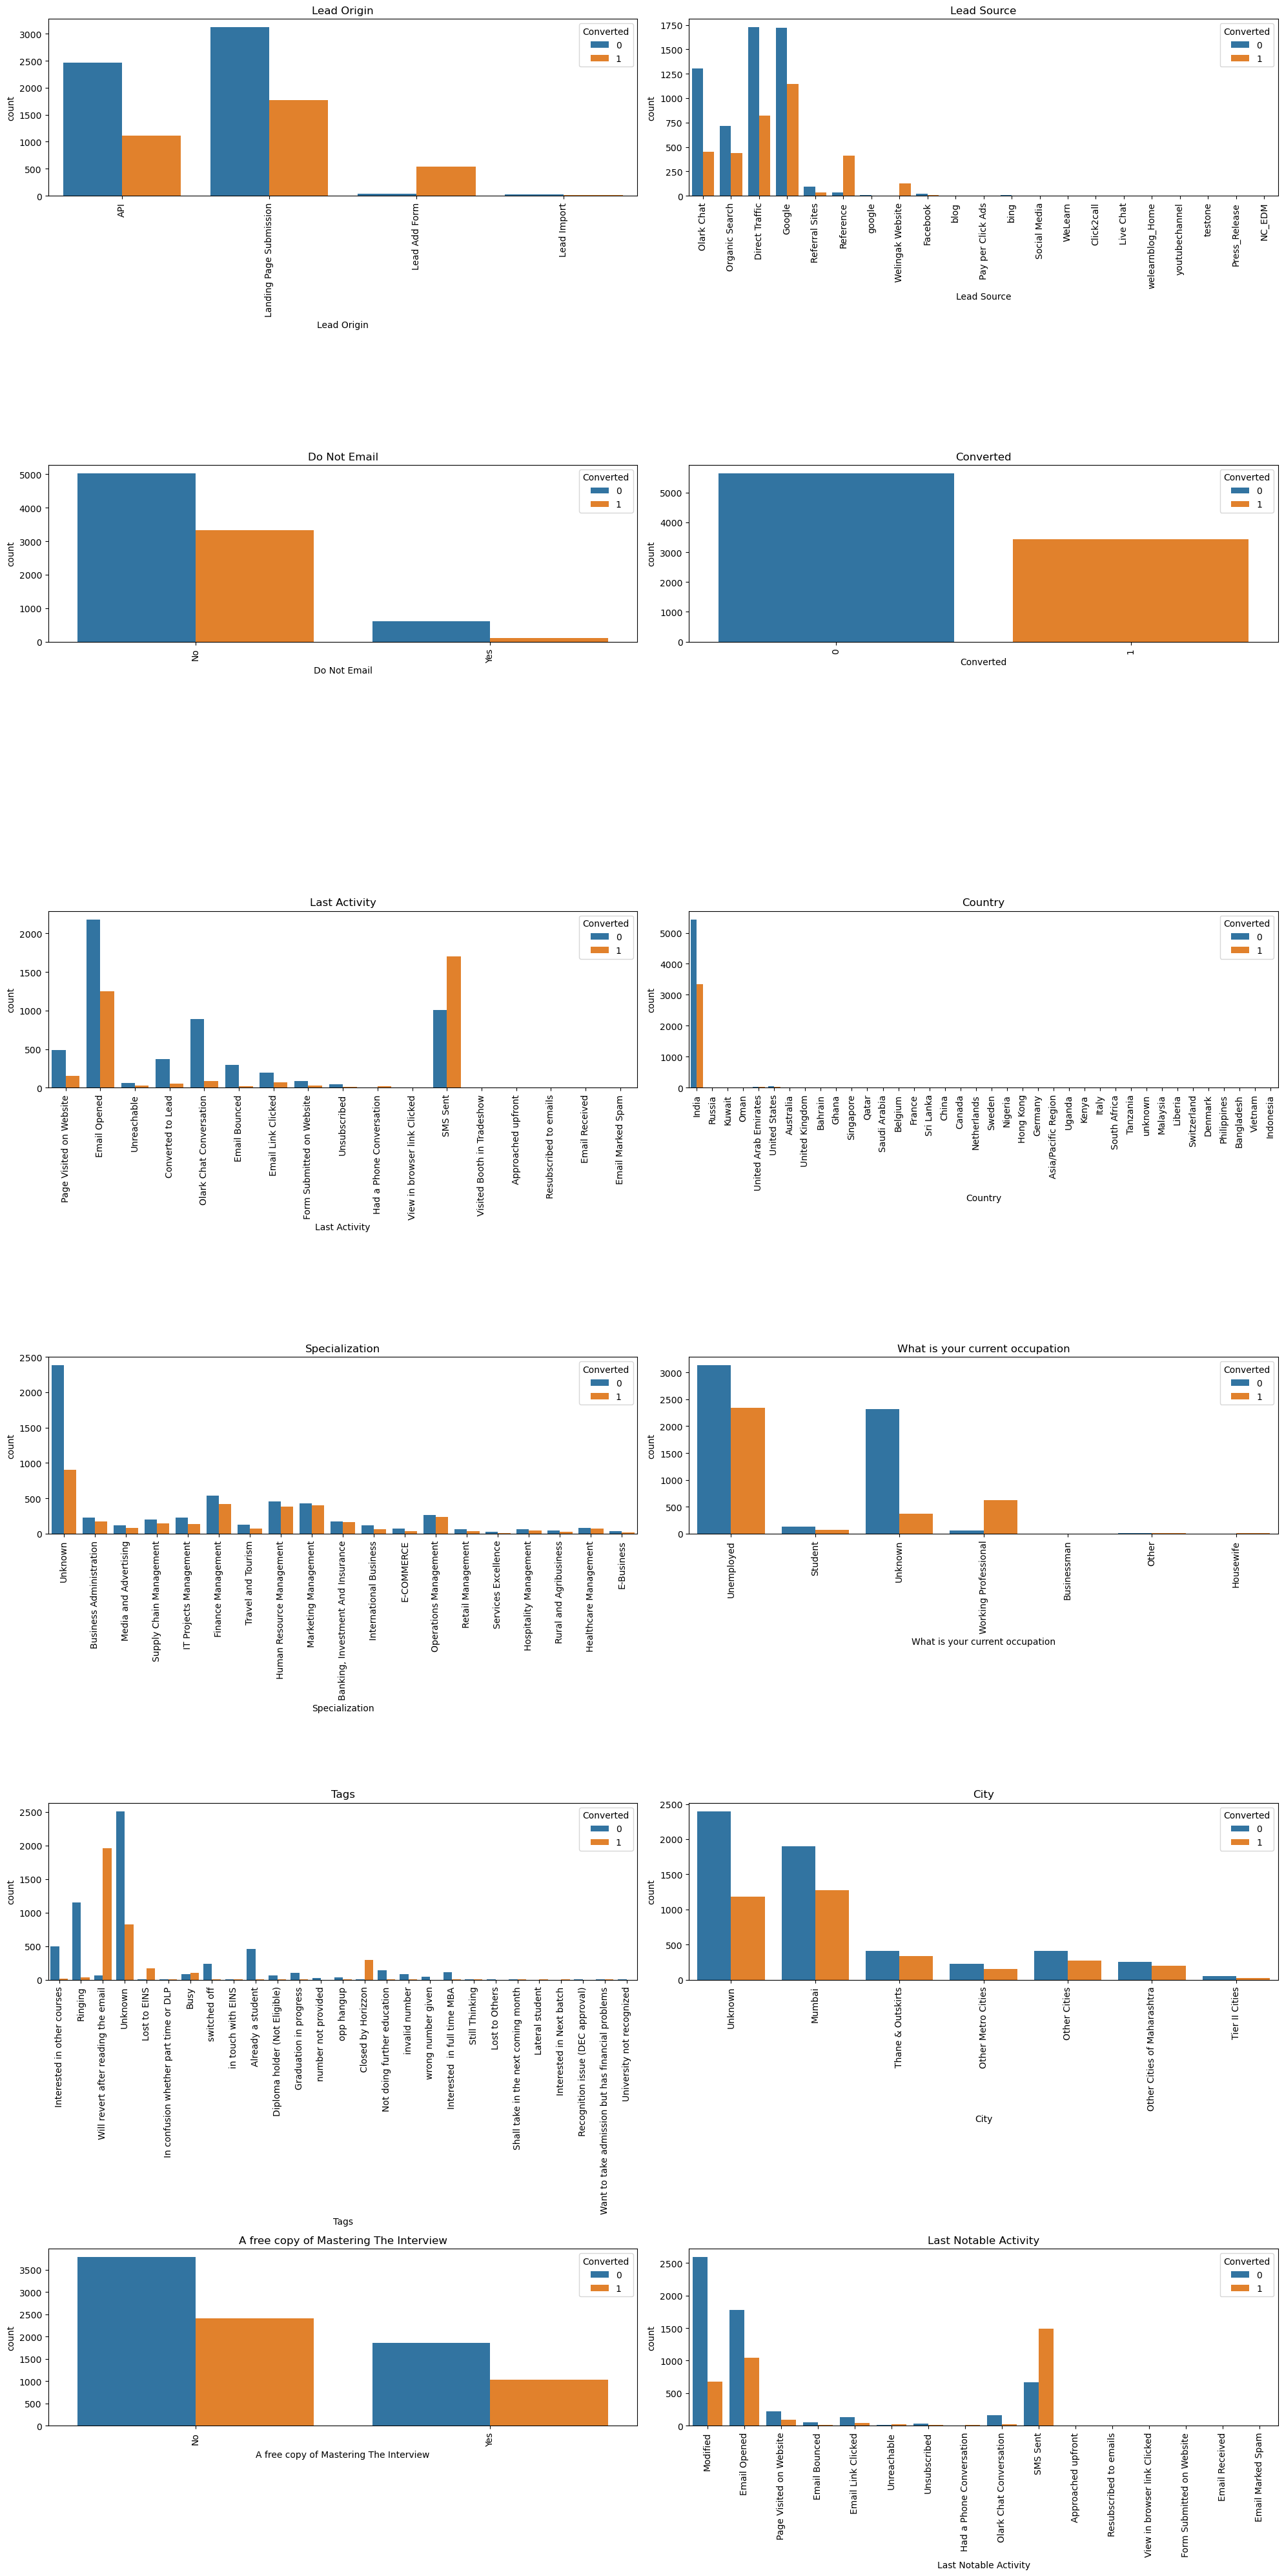

In [831]:
plt.figure(figsize = (20,40))

for i, col in enumerate(df1.columns, 1):
    plt.subplot(6, 2, i)
    sns.countplot(x=col, hue='Converted', data=df1)
    plt.title(col)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<Axes: ylabel='TotalVisits'>

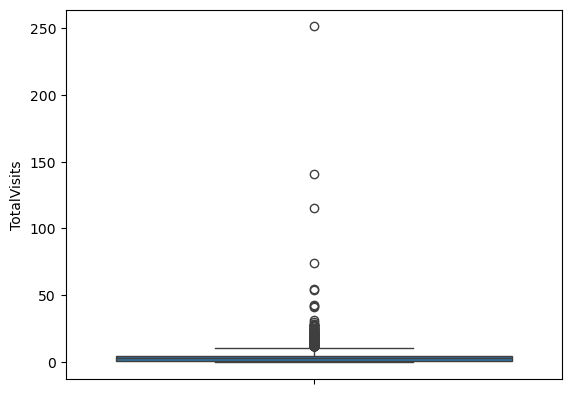

In [832]:
sns.boxplot(df['TotalVisits'],orient='vert')

In [833]:
#remove outliers
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: xlabel='Converted', ylabel='TotalVisits'>

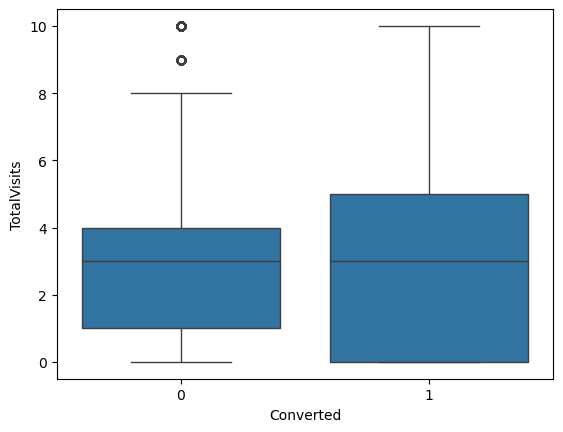

In [834]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

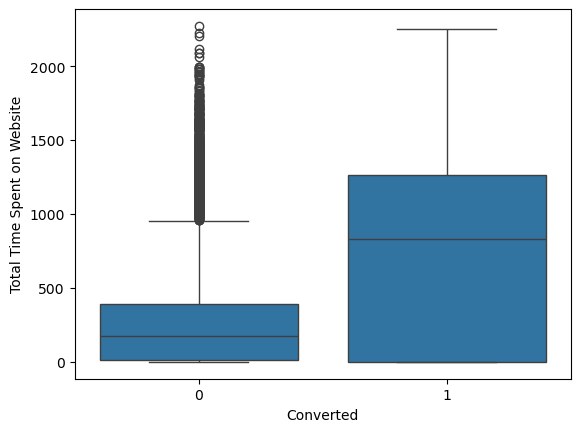

In [835]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

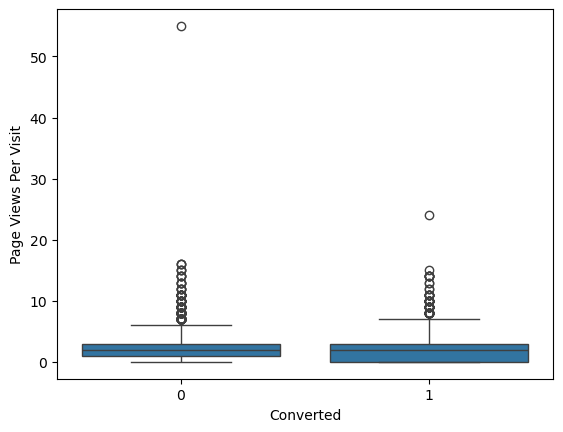

In [836]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)

In [837]:
#remove outliers
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

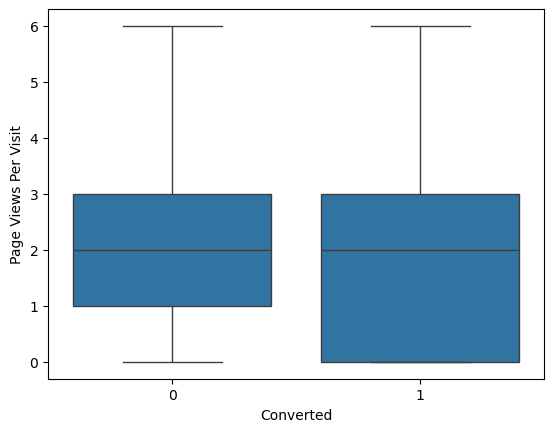

In [838]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)

In [839]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Lead Origin                             9074 non-null   object
 1   Lead Source                             9074 non-null   object
 2   Do Not Email                            9074 non-null   object
 3   Converted                               9074 non-null   int64 
 4   TotalVisits                             9074 non-null   int64 
 5   Total Time Spent on Website             9074 non-null   int64 
 6   Page Views Per Visit                    9074 non-null   int64 
 7   Last Activity                           9074 non-null   object
 8   Country                                 9074 non-null   object
 9   Specialization                          9074 non-null   object
 10  What is your current occupation         9074 non-null   object
 11  Tags     

In [840]:
# Dropping columns which do not seem important from EDA
df = df.drop(['Do Not Email', 'Country', 'Tags'], axis=1 )

In [841]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Lead Origin                             9074 non-null   object
 1   Lead Source                             9074 non-null   object
 2   Converted                               9074 non-null   int64 
 3   TotalVisits                             9074 non-null   int64 
 4   Total Time Spent on Website             9074 non-null   int64 
 5   Page Views Per Visit                    9074 non-null   int64 
 6   Last Activity                           9074 non-null   object
 7   Specialization                          9074 non-null   object
 8   What is your current occupation         9074 non-null   object
 9   City                                    9074 non-null   object
 10  A free copy of Mastering The Interview  9074 non-null   object
 11  Last Nota

### Heatmap to check correlation

In [843]:
numerical_vars = df.select_dtypes(include='number')
numerical_vars.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

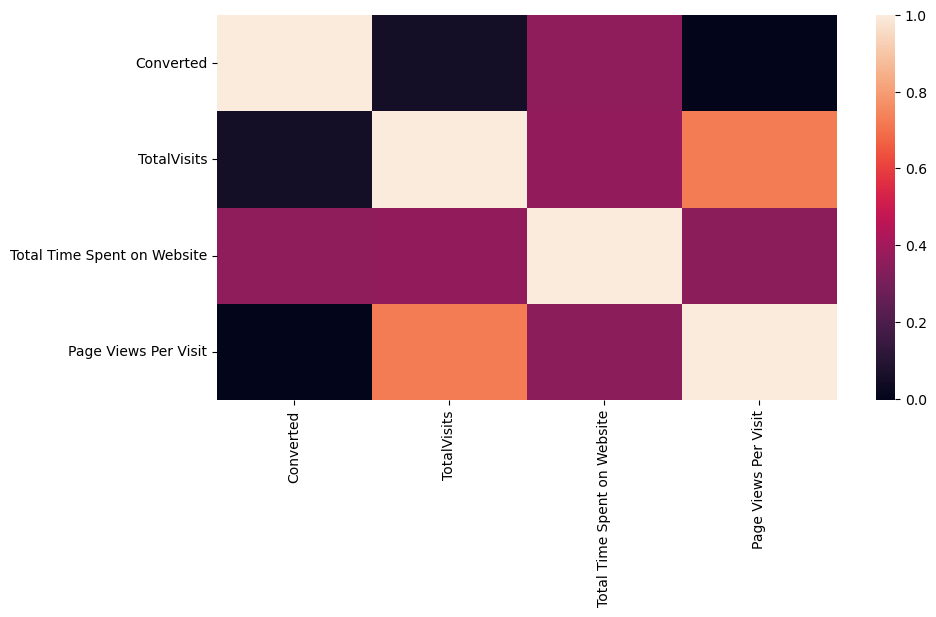

In [844]:
plt.figure(figsize=(10,5))
sns.heatmap(numerical_vars.corr())
plt.show()

### Creating Dummy variables

In [846]:
categorical_vars = df.select_dtypes(include='object')
categorical_vars.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [847]:
df['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
No     6186
Yes    2888
Name: count, dtype: int64

In [848]:
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].map({'Yes': 1, "No": 0})

In [849]:
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City', 'Last Notable Activity']], drop_first=True, dtype=int)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [850]:
df = pd.concat([df, dummy], axis=1)
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City', 'Last Notable Activity'], axis =1)
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5,674,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,1532,2,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,305,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2,1428,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Test-Train Split

In [852]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

In [853]:
X = df.drop('Converted', axis=1)
y = df['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Scaling

In [855]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7656,1.030419,-0.236218,2.156824,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7775,-1.141566,-0.882958,-1.221087,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5287,0.306424,-0.498956,1.030854,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3315,2.478409,1.873037,-0.095116,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4058,-1.141566,-0.882958,-1.221087,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


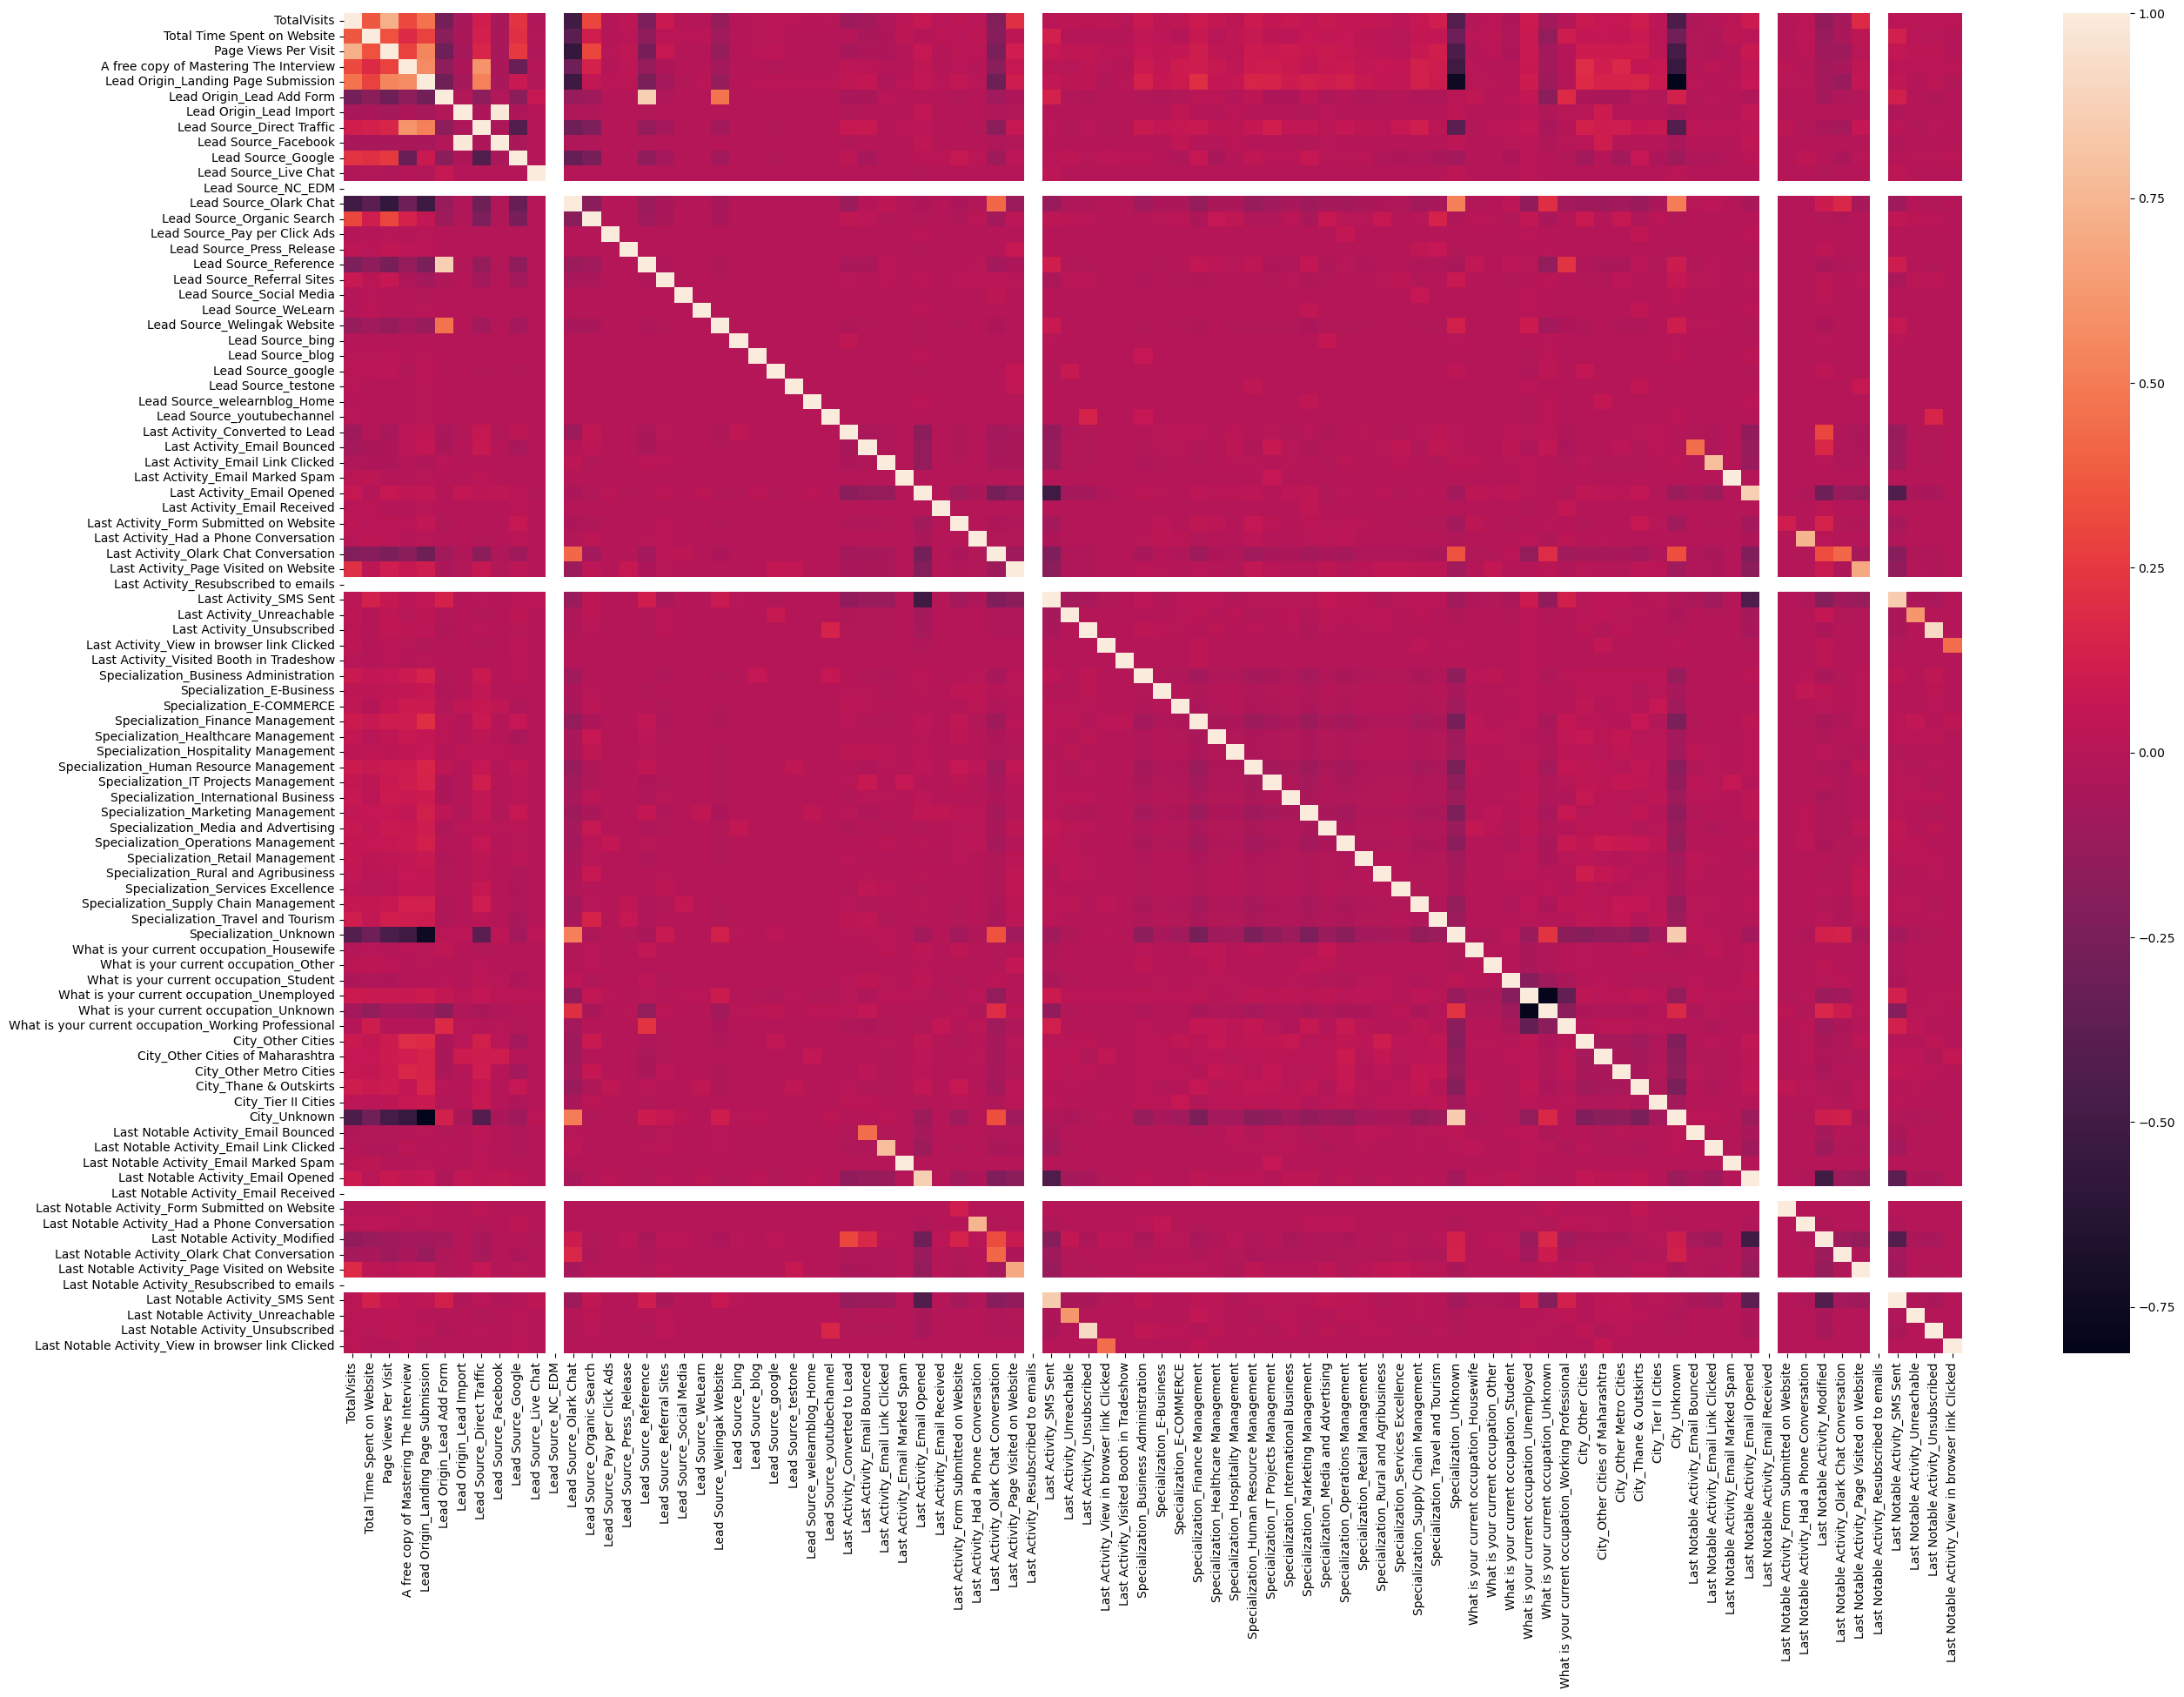

In [856]:
# Correlation using heatmap
plt.figure(figsize=(30,20))
sns.heatmap(X_train.corr())
plt.show()

### Feature selection using RFE

In [858]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=15)  # selecting 15 features
rfe.fit(X_train, y_train)

# Check which features were selected
print("Selected Features:", X_train.columns[rfe.support_])

Selected Features: Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Specialization_Unknown', 'What is your current occupation_Housewife',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')


In [859]:
X_train = X_train[X_train.columns[rfe.support_]]

### Model Building

In [861]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2595.2
Date:                Sun, 15 Sep 2024   Deviance:                       5190.3
Time:                        14:59:13   Pearson chi2:                 6.29e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3999
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2833      0.123     -2.310      0.021      -0.524      -0.043
Total Time Spent on Website                              1.0849      0.040     26.849      0.000       1.006       1.164
Lead Origin_Landing Page Submission                     -1.0543      0.127     -8.302      0.000      -1.303      -0.805
Lead Origin_Lead Add Form                                3.2161      0.244     13.182      0.000       2.738       3.694
Lead Source_Olark Chat                                   1.1001      0.122      9.032      0.000       0.861       1.339
Lead Source_Welingak Website                             2.9782      1.040      2.863      0.004       0.939       5.017
Last Activity_Email Bounced                             -1.7743      0.358     -4.954      0.000      -2.476      -1.072
Last Activity_Had a Phone Conversation                   1.0181      0.895      1.137      0.255      -0.737       2.773
Last Activity_SMS Sent                                   0.5054      0.144      3.522      0.000       0.224       0.787
Specialization_Unknown                                  -1.1419      0.124     -9.205      0.000      -1.385      -0.899
What is your current occupation_Housewife               22.8672   1.36e+04      0.002      0.999   -2.67e+04    2.67e+04
What is your current occupation_Unknown                 -1.2049      0.090    -13.423      0.000      -1.381      -1.029
What is your current occupation_Working Professional     2.3088      0.190     12.147      0.000       1.936       2.681
Last Notable Activity_Had a Phone Conversation           2.4576      1.459      1.685      0.092      -0.401       5.316
Last Notable Activity_SMS Sent                           1.0926      0.153      7.160      0.000       0.793       1.392
Last Notable Activity_Unreachable                        1.9677      0.561      3.507      0.000       0.868       3.067
========================================================================================================================
"""

In [862]:
#check p-values and the VIFs

In [863]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,5.22
13,Last Notable Activity_SMS Sent,4.84
6,Last Activity_Had a Phone Conversation,2.26
12,Last Notable Activity_Had a Phone Conversation,2.25
8,Specialization_Unknown,2.13
3,Lead Source_Olark Chat,1.93
10,What is your current occupation_Unknown,1.61
1,Lead Origin_Landing Page Submission,1.58
2,Lead Origin_Lead Add Form,1.56
4,Lead Source_Welingak Website,1.34


In [864]:
#Remove features with high p-values because they may not be statistically significant - What is your current occupation_Housewife'

In [865]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [866]:
# Refit the model
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.8
Date:                Sun, 15 Sep 2024   Deviance:                       5203.6
Time:                        14:59:13   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3987
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2754      0.122     -2.248      0.025      -0.515      -0.035
Total Time Spent on Website                              1.0843      0.040     26.867      0.000       1.005       1.163
Lead Origin_Landing Page Submission                     -1.0510      0.127     -8.288      0.000      -1.300      -0.802
Lead Origin_Lead Add Form                                3.2298      0.244     13.256      0.000       2.752       3.707
Lead Source_Olark Chat                                   1.0986      0.122      9.024      0.000       0.860       1.337
Lead Source_Welingak Website                             2.9631      1.040      2.849      0.004       0.924       5.002
Last Activity_Email Bounced                             -1.7814      0.358     -4.975      0.000      -2.483      -1.080
Last Activity_Had a Phone Conversation                   1.0099      0.895      1.128      0.259      -0.745       2.765
Last Activity_SMS Sent                                   0.4983      0.144      3.472      0.001       0.217       0.780
Specialization_Unknown                                  -1.1459      0.124     -9.246      0.000      -1.389      -0.903
What is your current occupation_Unknown                 -1.2092      0.090    -13.479      0.000      -1.385      -1.033
What is your current occupation_Working Professional     2.3009      0.190     12.109      0.000       1.928       2.673
Last Notable Activity_Had a Phone Conversation           2.4560      1.459      1.684      0.092      -0.403       5.315
Last Notable Activity_SMS Sent                           1.0919      0.153      7.153      0.000       0.793       1.391
Last Notable Activity_Unreachable                        1.9612      0.561      3.495      0.000       0.861       3.061
========================================================================================================================
"""

In [867]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,5.22
12,Last Notable Activity_SMS Sent,4.84
6,Last Activity_Had a Phone Conversation,2.26
11,Last Notable Activity_Had a Phone Conversation,2.25
8,Specialization_Unknown,2.13
3,Lead Source_Olark Chat,1.93
9,What is your current occupation_Unknown,1.61
1,Lead Origin_Landing Page Submission,1.58
2,Lead Origin_Lead Add Form,1.55
4,Lead Source_Welingak Website,1.34


In [868]:
#Remove - 'Last Activity_Had a Phone Conversation' as it has high p value

In [869]:
X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [870]:
# Refit the model
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2602.4
Date:                Sun, 15 Sep 2024   Deviance:                       5204.8
Time:                        14:59:13   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3985
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2732      0.122     -2.231      0.026      -0.513      -0.033
Total Time Spent on Website                              1.0847      0.040     26.881      0.000       1.006       1.164
Lead Origin_Landing Page Submission                     -1.0507      0.127     -8.286      0.000      -1.299      -0.802
Lead Origin_Lead Add Form                                3.2319      0.244     13.267      0.000       2.754       3.709
Lead Source_Olark Chat                                   1.0966      0.122      9.012      0.000       0.858       1.335
Lead Source_Welingak Website                             2.9592      1.040      2.845      0.004       0.921       4.998
Last Activity_Email Bounced                             -1.7838      0.358     -4.982      0.000      -2.486      -1.082
Last Activity_SMS Sent                                   0.4958      0.144      3.455      0.001       0.214       0.777
Specialization_Unknown                                  -1.1448      0.124     -9.239      0.000      -1.388      -0.902
What is your current occupation_Unknown                 -1.2094      0.090    -13.484      0.000      -1.385      -1.034
What is your current occupation_Working Professional     2.3006      0.190     12.112      0.000       1.928       2.673
Last Notable Activity_Had a Phone Conversation           3.4637      1.154      3.002      0.003       1.203       5.725
Last Notable Activity_SMS Sent                           1.0920      0.153      7.154      0.000       0.793       1.391
Last Notable Activity_Unreachable                        1.9590      0.561      3.491      0.000       0.859       3.059
========================================================================================================================
"""

In [871]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_SMS Sent,5.22
11,Last Notable Activity_SMS Sent,4.84
7,Specialization_Unknown,2.13
3,Lead Source_Olark Chat,1.93
8,What is your current occupation_Unknown,1.61
1,Lead Origin_Landing Page Submission,1.58
2,Lead Origin_Lead Add Form,1.55
4,Lead Source_Welingak Website,1.34
0,Total Time Spent on Website,1.30
9,What is your current occupation_Working Profes...,1.18


In [872]:
#Remove - 'Last Activity_SMS Sent' as it has VIF value greater than 5

In [873]:
X_train.drop('Last Activity_SMS Sent', axis = 1, inplace = True)

In [874]:
# Refit the model
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.2
Date:                Sun, 15 Sep 2024   Deviance:                       5216.5
Time:                        14:59:13   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3974
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2297      0.122     -1.887      0.059      -0.468       0.009
Total Time Spent on Website                              1.0878      0.040     26.966      0.000       1.009       1.167
Lead Origin_Landing Page Submission                     -1.0547      0.127     -8.324      0.000      -1.303      -0.806
Lead Origin_Lead Add Form                                3.2670      0.244     13.409      0.000       2.789       3.745
Lead Source_Olark Chat                                   1.0783      0.121      8.896      0.000       0.841       1.316
Lead Source_Welingak Website                             2.9864      1.040      2.873      0.004       0.949       5.024
Last Activity_Email Bounced                             -1.8278      0.358     -5.105      0.000      -2.529      -1.126
Specialization_Unknown                                  -1.1485      0.124     -9.279      0.000      -1.391      -0.906
What is your current occupation_Unknown                 -1.1828      0.089    -13.267      0.000      -1.358      -1.008
What is your current occupation_Working Professional     2.3042      0.190     12.143      0.000       1.932       2.676
Last Notable Activity_Had a Phone Conversation           3.4166      1.152      2.965      0.003       1.158       5.675
Last Notable Activity_SMS Sent                           1.5457      0.079     19.512      0.000       1.390       1.701
Last Notable Activity_Unreachable                        1.9099      0.560      3.408      0.001       0.811       3.008
========================================================================================================================
"""

In [875]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Specialization_Unknown,2.12
3,Lead Source_Olark Chat,1.93
7,What is your current occupation_Unknown,1.60
1,Lead Origin_Landing Page Submission,1.53
2,Lead Origin_Lead Add Form,1.53
10,Last Notable Activity_SMS Sent,1.40
4,Lead Source_Welingak Website,1.34
0,Total Time Spent on Website,1.29
8,What is your current occupation_Working Profes...,1.18
5,Last Activity_Email Bounced,1.06


VIF is less than 5 and p-values are below 0.05

### Model Evaluation

### Making predictions on the train dataset

In [879]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7656    0.501102
7775    0.220930
5287    0.138590
3315    0.679860
4058    0.995767
363     0.141036
6714    0.712134
4797    0.580916
9109    0.102803
5264    0.079947
dtype: float64

In [880]:
y_train_pred = y_train_pred.values.reshape(-1)

In [881]:
train=pd.DataFrame({'Actual':y_train.values, 'Predicted_prob':y_train_pred})
train["Predicted"]=np.where(train["Predicted_prob"]>0.5,1,0)
train.head()

,Actual,Predicted_prob,Predicted
0,0,0.501102,1
1,0,0.220930,0
2,0,0.138590,0
3,1,0.679860,1
4,1,0.995767,1


In [882]:
from sklearn import metrics
print("Train Accuracy =", metrics.accuracy_score(train["Actual"], train["Predicted"]))

Train Accuracy = 0.812470477090222


In [883]:
#confusion matrix 
confusion = metrics.confusion_matrix(train.Actual, train.Predicted )
confusion

array([[3501,  438],
       [ 753, 1659]])

In [884]:
#true positive
TP = confusion[1,1]
# true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1] 
# false negatives
FN = confusion[1,0]

In [885]:
# Calculating the sensitivity
print("Sensitivity :",TP/(TP+FN))

# Calculating the specificity
print("Specificity :",TN/(TN+FP))

# Calculate false postive rate 
print("False Positive Rate :",FP/ float(TN+FP))

# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Sensitivity : 0.6878109452736318
Specificity : 0.8888042650418888
False Positive Rate : 0.11119573495811119
Positive Predictive Value : 0.7911301859799714
Negative predictive value : 0.8229901269393513


#### Finding Optimal Cutoff Point

In [887]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [888]:
fpr, tpr, thresholds = metrics.roc_curve(train.Actual, train.Predicted_prob, drop_intermediate = False )

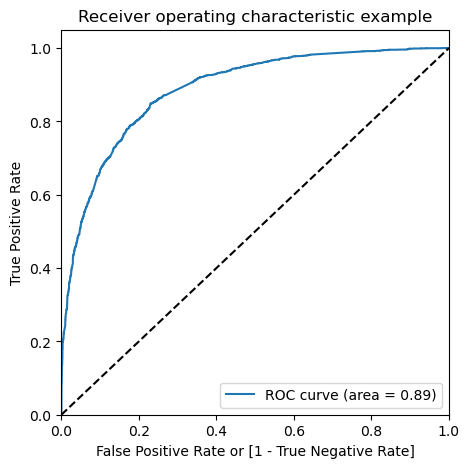

In [889]:
# Call the ROC function
draw_roc(train.Actual, train.Predicted_prob)

In [890]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    train[i]= train.Predicted_prob.map(lambda x: 1 if x > i else 0)
train.head()

,Actual,Predicted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.501102,1,1,1,1,1,1,1,0,0,0,0
1,0,0.220930,0,1,1,1,0,0,0,0,0,0,0
2,0,0.138590,0,1,1,0,0,0,0,0,0,0,0
3,1,0.679860,1,1,1,1,1,1,1,1,0,0,0
4,1,0.995767,1,1,1,1,1,1,1,1,1,1,1


In [891]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(train.Actual, train[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.379783,1.000000,0.000000
0.1,0.1,0.617855,0.977197,0.397817
0.2,0.2,0.750590,0.916667,0.648896
0.3,0.3,0.798299,0.831675,0.777862
0.4,0.4,0.811053,0.776949,0.831937
0.5,0.5,0.812470,0.687811,0.888804
0.6,0.6,0.798929,0.591211,0.926123
0.7,0.7,0.786963,0.521559,0.949480
0.8,0.8,0.763974,0.427032,0.970297
0.9,0.9,0.716108,0.270730,0.988830


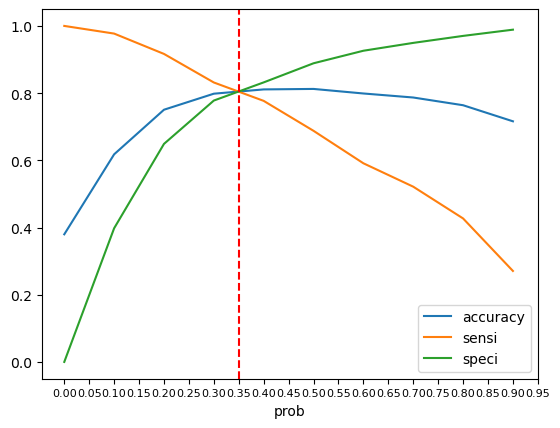

In [892]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.35, color='r', linestyle='--') # additing axline

plt.show()

In [893]:
train['final_predicted'] = train.Predicted_prob.map( lambda x: 1 if x > 0.35 else 0)
train.head()

,Actual,Predicted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.501102,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.220930,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.138590,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.679860,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.995767,1,1,1,1,1,1,1,1,1,1,1,1


In [894]:
print("Train Accuracy =", metrics.accuracy_score(train["Actual"], train["final_predicted"]))

Train Accuracy = 0.8023933238860022


In [895]:
#confusion matrix 
confusion = metrics.confusion_matrix(train.Actual, train.final_predicted )
confusion

array([[3153,  786],
       [ 469, 1943]])

In [896]:
#true positive
TP = confusion[1,1]
# true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1] 
# false negatives
FN = confusion[1,0]

In [897]:
# Calculating the sensitivity
print("Sensitivity :",TP/(TP+FN))

# Calculating the specificity
print("Specificity :",TN/(TN+FP))

# Calculate false postive rate 
print("False Positive Rate :",FP/ float(TN+FP))

# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

#Precision
print ("Precision :",TP / float(TP + FP))

#Recall
print ("Recall :",TP / float(TP + FN))

Sensitivity : 0.8055555555555556
Specificity : 0.8004569687738005
False Positive Rate : 0.19954303122619954
Positive Predictive Value : 0.7119824111396116
Negative predictive value : 0.8705135284373274
Precision : 0.7119824111396116
Recall : 0.8055555555555556


In [898]:
from sklearn.metrics import precision_score, recall_score

In [899]:
precision_score(train.Actual, train.final_predicted)

0.7119824111396116

In [900]:
recall_score(train.Actual, train.final_predicted)

0.8055555555555556

### Predictions on test dataset with 0.35 threshold

In [902]:
#sclaing test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [903]:
X_test_sm=sm.add_constant(X_test[X_train.columns])
X_test_sm

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4079,1.0,1.795869,1,0,0,0,0,0,1,0,0,0,0
8310,1.0,-0.882958,0,0,1,0,0,1,0,0,0,1,0
1708,1.0,-0.375855,1,0,0,0,0,0,0,0,0,0,0
8025,1.0,1.777496,0,0,0,0,0,1,0,0,0,0,0
2414,1.0,-0.882958,0,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671,1.0,-0.570612,1,0,0,0,0,0,0,1,0,1,0
5884,1.0,-0.622057,1,0,0,0,0,0,0,0,0,0,0
2407,1.0,-0.405252,1,0,0,0,0,0,1,0,0,0,0
148,1.0,-0.456698,1,0,0,0,0,0,0,0,0,0,0


In [904]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4079    0.374344
8310    0.570871
1708    0.155362
8025    0.635382
2414    0.079947
5640    0.079947
5978    0.408065
8659    0.100219
9095    0.041820
2861    0.138590
dtype: float64

In [905]:
y_test_pred = y_test_pred.values.reshape(-1)

In [906]:
test=pd.DataFrame({'Actual':y_test.values, 'Predicted_prob':y_test_pred})
test["Predicted"]=np.where(test["Predicted_prob"]>0.35,1,0)
test.head()

,Actual,Predicted_prob,Predicted
0,0,0.374344,1
1,1,0.570871,1
2,0,0.155362,0
3,1,0.635382,1
4,0,0.079947,0


In [907]:
print("Test Accuracy =", metrics.accuracy_score(test["Actual"], test["Predicted"]))

Test Accuracy = 0.8046272493573264


In [908]:
#confusion matrix 
confusion_test = metrics.confusion_matrix(test.Actual, test.Predicted )
confusion_test

array([[1360,  340],
       [ 192,  831]])

In [909]:
#true positive
TP = confusion_test[1,1]
# true negatives
TN = confusion_test[0,0]
# false positives
FP = confusion_test[0,1] 
# false negatives
FN = confusion_test[1,0]

In [910]:
# Calculating the sensitivity
print("Sensitivity :",TP/(TP+FN))

# Calculating the specificity
print("Specificity :",TN/(TN+FP))

# Calculate false postive rate 
print("False Positive Rate :",FP/ float(TN+FP))

# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

#Precision
print ("Precision :",TP / float(TP + FP))

#Recall
print ("Recall :",TP / float(TP + FN))

Sensitivity : 0.8123167155425219
Specificity : 0.8
False Positive Rate : 0.2
Positive Predictive Value : 0.7096498719043552
Negative predictive value : 0.8762886597938144
Precision : 0.7096498719043552
Recall : 0.8123167155425219


### Precision and recall tradeoff on train data

In [912]:
from sklearn.metrics import precision_recall_curve

In [913]:
p, r, thresholds = precision_recall_curve(train.Actual, train.Predicted_prob)

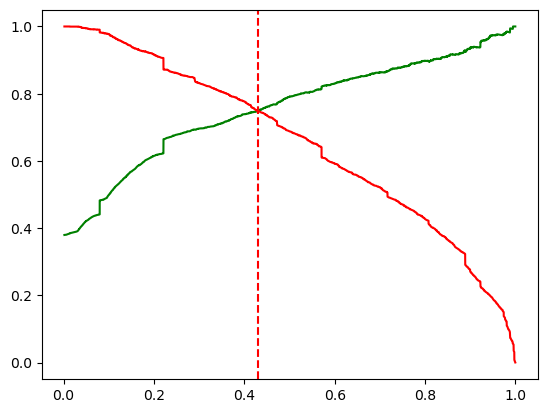

In [914]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.43, color='r', linestyle='--') # additing axline

plt.show()

0.43 as new cut-off point

In [916]:
train['final_predicted'] = train.Predicted_prob.map( lambda x: 1 if x > 0.43 else 0)
train.head()

,Actual,Predicted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.501102,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.220930,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.138590,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.679860,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.995767,1,1,1,1,1,1,1,1,1,1,1,1


In [917]:
print("Train Accuracy =", metrics.accuracy_score(train["Actual"], train["final_predicted"]))

Train Accuracy = 0.8088490001574555


In [918]:
#confusion matrix 
confusion = metrics.confusion_matrix(train.Actual, train.final_predicted )
confusion

array([[3333,  606],
       [ 608, 1804]])

In [919]:
#true positive
TP = confusion[1,1]
# true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1] 
# false negatives
FN = confusion[1,0]

In [920]:
# Calculating the sensitivity
print("Sensitivity :",TP/(TP+FN))

# Calculating the specificity
print("Specificity :",TN/(TN+FP))

# Calculate false postive rate 
print("False Positive Rate :",FP/ float(TN+FP))

# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

#Precision
print ("Precision :",TP / float(TP + FP))

#Recall
print ("Recall :",TP / float(TP + FN))

Sensitivity : 0.7479270315091211
Specificity : 0.8461538461538461
False Positive Rate : 0.15384615384615385
Positive Predictive Value : 0.7485477178423237
Negative predictive value : 0.8457244354224817
Precision : 0.7485477178423237
Recall : 0.7479270315091211


# Prediction on test data with 0.43 threshold

In [922]:
test["final_predicted"]=np.where(test["Predicted_prob"]>0.43,1,0)
test.head()

,Actual,Predicted_prob,Predicted,final_predicted
0,0,0.374344,1,0
1,1,0.570871,1,1
2,0,0.155362,0,0
3,1,0.635382,1,1
4,0,0.079947,0,0


In [923]:
print("Test Accuracy =", metrics.accuracy_score(test["Actual"], test["final_predicted"]))

Test Accuracy = 0.8105031215571061


In [924]:
#confusion matrix 
confusion_test = metrics.confusion_matrix(test.Actual, test.final_predicted )
confusion_test

array([[1441,  259],
       [ 257,  766]])

In [925]:
#true positive
TP = confusion_test[1,1]
# true negatives
TN = confusion_test[0,0]
# false positives
FP = confusion_test[0,1] 
# false negatives
FN = confusion_test[1,0]

In [926]:
# Calculating the sensitivity
print("Sensitivity :",TP/(TP+FN))

# Calculating the specificity
print("Specificity :",TN/(TN+FP))

# Calculate false postive rate 
print("False Positive Rate :",FP/ float(TN+FP))

# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

#Precision
print ("Precision :",TP / float(TP + FP))

#Recall
print ("Recall :",TP / float(TP + FN))

Sensitivity : 0.7487781036168133
Specificity : 0.8476470588235294
False Positive Rate : 0.15235294117647058
Positive Predictive Value : 0.7473170731707317
Negative predictive value : 0.8486454652532391
Precision : 0.7473170731707317
Recall : 0.7487781036168133


In [927]:
test['Lead_Score'] = test.Predicted_prob.map( lambda x: round(x*100))

test.head()

,Actual,Predicted_prob,Predicted,final_predicted,Lead_Score
0,0,0.374344,1,0,37
1,1,0.570871,1,1,57
2,0,0.155362,0,0,16
3,1,0.635382,1,1,64
4,0,0.079947,0,0,8


In [928]:
train['Lead_Score'] = train.Predicted_prob.map( lambda x: round(x*100))

train.head()

,Actual,Predicted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.501102,1,1,1,1,1,1,1,0,0,0,0,1,50
1,0,0.220930,0,1,1,1,0,0,0,0,0,0,0,0,22
2,0,0.138590,0,1,1,0,0,0,0,0,0,0,0,0,14
3,1,0.679860,1,1,1,1,1,1,1,1,0,0,0,1,68
4,1,0.995767,1,1,1,1,1,1,1,1,1,1,1,1,100


In [929]:
res.params.sort_values(ascending=False)

Last Notable Activity_Had a Phone Conversation          3.416612
Lead Origin_Lead Add Form                               3.267012
Lead Source_Welingak Website                            2.986434
What is your current occupation_Working Professional    2.304197
Last Notable Activity_Unreachable                       1.909860
Last Notable Activity_SMS Sent                          1.545664
Total Time Spent on Website                             1.087769
Lead Source_Olark Chat                                  1.078327
const                                                  -0.229651
Lead Origin_Landing Page Submission                    -1.054653
Specialization_Unknown                                 -1.148479
What is your current occupation_Unknown                -1.182811
Last Activity_Email Bounced                            -1.827809
dtype: float64